## Análise da loja que pode ser vendida:
De acordo com os números informados a loja que eu venderia seria a loja_04 por ter o menor faturamento.
Verificando também outros parâmetros, apesar da loja_01 ter uma avaliação dos clientes um pouco menor, isso poderia ser resolvido realocando alguns profissionais da loja a ser fechada na loja_01
Como a venda por categorias é muito parecido entre todas as lojas, ele acaba não impactando no resultado.


In [65]:
import matplotlib.pyplot as plt
import pandas as pd

In [56]:
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja_01 = pd.read_csv(url)
loja_02 = pd.read_csv(url2)
loja_03 = pd.read_csv(url3)
loja_04 = pd.read_csv(url4)

loja_01.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [57]:
# Lista para armazenar os resultados
resultados = []
dados_lojas = {"loja_01": loja_01, "loja_02": loja_02, "loja_03": loja_03, "loja_04": loja_04}

# Processar cada loja
for nome_loja, df in dados_lojas.items():

    preco_total = df["Preço"].sum()
    frete_total = df["Frete"].sum()
    faturamento_total = preco_total + frete_total

    resultados.append({
        "Loja": nome_loja,
        "Faturamento Preço": round(preco_total, 2),
        "Frete": round(frete_total, 2),
        "Faturamento Total (Preço + Frete)": round(faturamento_total, 2)
    })

# Criar DataFrame de resumo
resumo = pd.DataFrame(resultados)

resumo

,Loja,Faturamento Preço,Frete,Faturamento Total (Preço + Frete)
0,loja_01,1534509.12,81837.97,1616347.09
1,loja_02,1488459.06,79314.16,1567773.22
2,loja_03,1464025.03,78022.66,1542047.69
3,loja_04,1384497.58,73755.88,1458253.46


# 2. Vendas por Categoria


In [58]:
# Lista para armazenar os resultados por categoria
resultados_categoria = []

# Loop por loja
for nome_loja, df_loja in dados_lojas.items():
    # Agrupar por categoria e somar Preço e Frete
    agrupado = df_loja.groupby("Categoria do Produto")[["Preço", "Frete"]].sum().reset_index()
    agrupado["Faturamento Total (Preço + Frete)"] = agrupado["Preço"] + agrupado["Frete"]
    agrupado["Loja"] = nome_loja  # Adiciona nome da loja

    resultados_categoria.append(agrupado)

# Junta os resultados de todas as lojas em um único DataFrame
resumo_por_categoria = pd.concat(resultados_categoria, ignore_index=True)

# Reorganiza as colunas
resumo_por_categoria = resumo_por_categoria[
    ["Loja", "Categoria do Produto", "Preço", "Frete", "Faturamento Total (Preço + Frete)"]
]

# Mostra o resultado
resumo_por_categoria

,Loja,Categoria do Produto,Preço,Frete,Faturamento Total (Preço + Frete)
0,loja_01,brinquedos,23993.78,1305.485959,25299.265959
1,loja_01,eletrodomesticos,484913.36,25764.960571,510678.320571
2,loja_01,eletronicos,572659.23,30619.008660,603278.238660
3,loja_01,esporte e lazer,52387.55,2829.107567,55216.657567
4,loja_01,instrumentos musicais,121731.69,6511.805861,128243.495861
5,loja_01,livros,11713.92,622.490244,12336.410244
6,loja_01,moveis,250178.11,13327.207336,263505.317336
7,loja_01,utilidades domesticas,16931.48,857.901598,17789.381598
8,loja_02,brinquedos,21262.21,1183.618832,22445.828832
9,loja_02,eletrodomesticos,464758.13,24740.999045,489499.129045


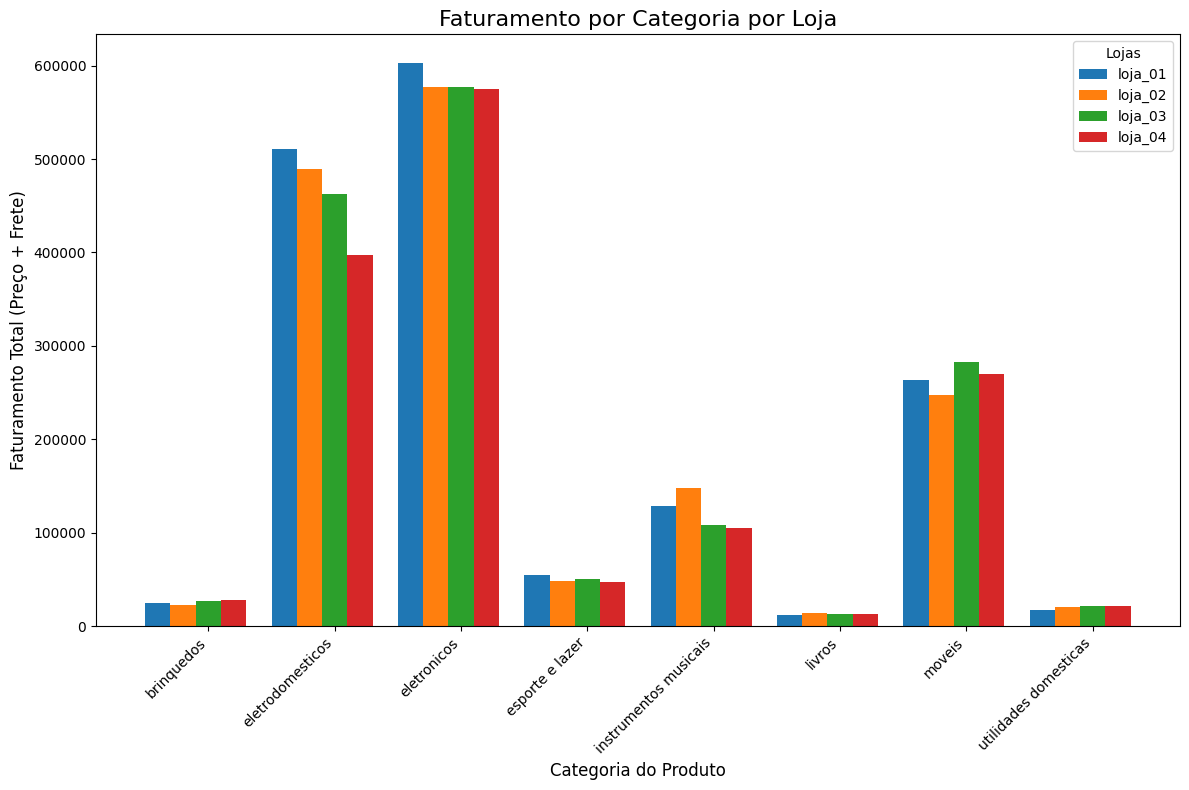

In [59]:
# Criar gráfico
plt.figure(figsize=(12, 8))

# Pegar as categorias e lojas para criar barras
categorias = resumo_por_categoria["Categoria do Produto"].unique()
lojas = resumo_por_categoria["Loja"].unique()

# Definir a largura das barras
bar_width = 0.2

# Definir posições das barras no eixo X
r = range(len(categorias))

# Definir o offset para cada loja (para que as barras não se sobreponham)
offsets = [i * bar_width for i in range(len(lojas))]

# Plotar as barras para cada loja
for i, loja in enumerate(lojas):
    # Filtrar os dados por loja
    dados_loja = resumo_por_categoria[resumo_por_categoria["Loja"] == loja]
    
    # Plotar as barras
    plt.bar(
        [x + offsets[i] for x in r],  # Posição das barras para cada loja
        dados_loja["Faturamento Total (Preço + Frete)"],  # Altura das barras
        width=bar_width,  # Largura da barra
        label=loja  # Nome da loja
    )

# Títulos e rótulos
plt.title("Faturamento por Categoria por Loja", fontsize=16)
plt.xlabel("Categoria do Produto", fontsize=12)
plt.ylabel("Faturamento Total (Preço + Frete)", fontsize=12)
plt.xticks([x + bar_width * (len(lojas) / 2) for x in r], categorias, rotation=45, ha="right")

# Exibir a legenda
plt.legend(title="Lojas")

# Exibir o gráfico
plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

In [60]:
# Lista para armazenar os resultados
avaliacoes_loja = []

# Loop por loja
for nome_loja, df_loja in dados_lojas.items():
    media_avaliacao = df_loja["Avaliação da compra"].mean()

    avaliacoes_loja.append({
        "Loja": nome_loja,
        "Média da Avaliação": round(media_avaliacao, 2)
    })

# Criar DataFrame com o resumo
resumo_avaliacoes = pd.DataFrame(avaliacoes_loja)

# Mostrar o resultado
resumo_avaliacoes

,Loja,Média da Avaliação
0,loja_01,3.98
1,loja_02,4.04
2,loja_03,4.05
3,loja_04,4.00


# 4. Produtos Mais e Menos Vendidos

In [61]:
# Listas para armazenar os resultados
mais_vendidos = []
menos_vendidos = []

# Loop por loja
for nome_loja, df_loja in dados_lojas.items():
    # Agrupar por Produto: somar Preço e contar ocorrências (quantidade vendida)
    vendas_por_produto = df_loja.groupby("Produto").agg({
        "Preço": "sum",
        "Produto": "count"  # Conta quantas vezes o produto apareceu
    }).rename(columns={"Produto": "Quantidade"}).reset_index()

    # Ordenar pelos produtos mais e menos vendidos em valor total
    top_3 = vendas_por_produto.sort_values(by="Preço", ascending=False).head(3)
    bottom_3 = vendas_por_produto.sort_values(by="Preço", ascending=True).head(3)

    # Adicionar o nome da loja
    top_3["Loja"] = nome_loja
    bottom_3["Loja"] = nome_loja

    # Adicionar aos resultados
    mais_vendidos.append(top_3)
    menos_vendidos.append(bottom_3)

# Concatenar os resultados em DataFrames únicos
top_vendas = pd.concat(mais_vendidos, ignore_index=True)
bottom_vendas = pd.concat(menos_vendidos, ignore_index=True)

# Reorganizar colunas
top_vendas = top_vendas[["Loja", "Produto", "Quantidade", "Preço"]]
bottom_vendas = bottom_vendas[["Loja", "Produto", "Quantidade", "Preço"]]

# Exibir os resultados
print("Top 3 produtos mais vendidos por loja:")
top_vendas

Top 3 produtos mais vendidos por loja:


,Loja,Produto,Quantidade,Preço
0,loja_01,TV Led UHD 4K,60,189534.28
1,loja_01,Geladeira,54,149524.28
2,loja_01,Celular Plus X42,49,130536.40
3,loja_02,Celular Plus X42,55,150967.83
4,loja_02,TV Led UHD 4K,45,137833.06
5,loja_02,Geladeira,49,130176.48
6,loja_03,Geladeira,50,133185.99
7,loja_03,TV Led UHD 4K,42,128892.11
8,loja_03,Celular Plus X42,46,124300.84
9,loja_04,Celular Plus X42,48,128930.07


In [62]:
print("\nTop 3 produtos menos vendidos por loja:")
bottom_vendas


Top 3 produtos menos vendidos por loja:


,Loja,Produto,Quantidade,Preço
0,loja_01,Corda de pular,40,870.89
1,loja_01,Dinossauro Rex,40,918.40
2,loja_01,Cubo mágico 8x8,44,929.27
3,loja_02,Cubo mágico 8x8,45,858.22
4,loja_02,Dinossauro Rex,42,1027.41
5,loja_02,Corda de pular,50,1142.54
6,loja_03,Cubo mágico 8x8,44,853.81
7,loja_03,Dinossauro Rex,46,1060.78
8,loja_03,Corda de pular,53,1137.76
9,loja_04,Corda de pular,43,939.74


# 5. Frete Médio por Loja


In [63]:
# Lista para armazenar os resultados
frete_loja = []

# Loop por loja
for nome_loja, df_loja in dados_lojas.items():
    media_frete = df_loja["Frete"].mean()

    frete_loja.append({
        "Loja": nome_loja,
        "Média do Frete": round(media_frete, 2)
    })

# Criar DataFrame com o resumo
resumo_frete = pd.DataFrame(frete_loja)

# Mostrar o resultado
resumo_frete

,Loja,Média do Frete
0,loja_01,34.69
1,loja_02,33.62
2,loja_03,33.07
3,loja_04,31.28
